# Notebook 1: Intro to Jupyter, Python, & Pandas

Welcome to CIVENG-119 Notebook 1! 

In this notebook you will learn how to:
 1. Navigate Jupyter Notebooks (like this one)
 2. Write and edit text and code cells
 3. Use the `pandas` library 
 4. Load in data and manipulate it using `pandas`


# Welcome to Jupyter

The purpose of this section is to introduce you to the basics of a Jupyter notebook or remind you if you have already taken a class like Data 8. 

## What is a Jupyter Notebook?

This webpage is called a Jupyter notebook. A notebook is a place to write programs and view their results, and also to write text. Jupyter notebooks allow you to combine all of these elements in one place.

### Text Cells

In a notebook, each rectangle containing text or code is called a *cell*.

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called  [markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings. 
You don't need to learn too much about markdown.

After you edit a text cell, click the "run cell" button at the top that looks like `▶` in the toolbar at the top of this window, or hold down `shift` + press `return` or `enter`, to confirm any changes to the text and formatting.



**Your Turn:** This paragraph is in its own text cell. Try editing it so that this sentence is the last sentence in the paragraph, and then click the "run cell" `▶|` button or hold down `shift` + `return` or `enter`. 

### Code Cells

Code cells contain code in the Python 3 language. Running a code cell will execute all of the code it contains.

To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, either press `▶|` or hold down `shift` + `return` or `enter`.

Try running this cell:

In [7]:
print("Hello, World!")

Hello, World!


The fundamental building block of Python code is an expression. Cells can contain multiple lines with multiple expressions. When you run a cell, the lines of code are executed in the order in which they appear. Every `print` expression prints a line. Run the next cell and notice the order of the output.

In [8]:
print("First this line is printed,")
print("Go \N{Bear Face}s,")
print("and then this one.")

First this line is printed,
Go 🐻s,
and then this one.


<br>

# Introduction to the Data

Throughout this notebook we will be using one data set to introduce the pandas package, and data manipulation methods. The dataset contains PM2.5 microenvironmental exposure levels measured from wearable PM2.5 monitors, along with position from GPS data loggers.

**What is PM2.5?**
>Fine particulate matter (PM2.5) are solid or liquid particles suspended in air, where particles have an aerodynamic diameter less than or equal to 2.5 microns. At high levels, PM2.5 particles can reduce visibility and cause the air to appear hazy. Tracking PM2.5 is important because prolonged exposure to high levels of PM2.5 can cause adverse health effects to humans. The U.S. Environmental Protection Agency (EPA) enforces the National Ambient Air Quality Standards to minimize ambient PM2.5 pollution, where the annual and 24-hour limit is 12 and 35 ug/m^3, respectively.  

**Run the cell below to take a look at the data!**

In [14]:
# The code line below imports the pandas package (which we will learn more about soon).
import pandas as pd
import numpy as np

# The code lines below use the pandas package, under alias 'pd', to read in the csv dataset file and display it.
data = pd.read_excel('datasets/Personal_Exposures.xlsx')
data.head()

,Date,Time,GPS Lat,GPS Long,Mesh Lat,Mesh Long,PE PM2.5,Mesh PM2.5,Difference (PE PM25 - Mesh PM25),EnvClass,Activity
0,2019-04-07,12:26:35,33.93927,-117.20816,33.93977,-117.20833,1.33333,9.45786,-8.12452,NaN,NaN
1,2019-04-07,12:26:40,33.93927,-117.20654,33.93977,-117.20604,1.00000,9.42258,-8.42258,NaN,NaN
2,2019-04-07,12:26:45,33.93925,-117.20492,33.93977,-117.20604,1.00000,9.42258,-8.42258,NaN,NaN
3,2019-04-07,12:26:50,33.93923,-117.20337,33.93977,-117.20376,1.00000,9.38727,-8.38727,NaN,NaN
4,2019-04-07,12:26:55,33.93923,-117.20184,33.93977,-117.20147,1.00000,9.35192,-8.35192,NaN,NaN


You might have noticed that there are two types of PM2.5 data, `PE PM2.5` and `Mesh PM2.5`. `PE PM2.5` represents personal exposure PM2.5 measurements from wearable PM2.5 monitors. These monitiors were worn by various community participants in inland Southern California and continuosly took measurements over several days. `Mesh PM 2.5` represents the corresponding value of interpolated PM2.5 measurements made at regulatory air monitoring sites. See an example mesh below:

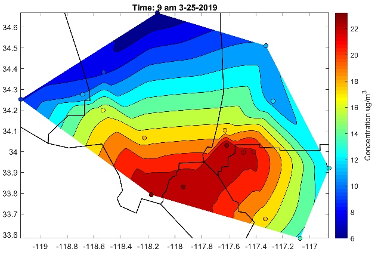

Here is a breakdown of the dataframe above and what each column represents. 


|Column Name   | Description |
|--------------|---------|
|Date |The date the PM2.5 was measured  |
|Time | The time the PM2.5 was measured |
|GPS Lat | The latitude measurement of the location of the personal exposure measurement |
|GPS Long | The longitude measurement of the location of the personal exposure measurement |
|Mesh Lat | The latitude measurement of the location of the stationary mesh measurement |
|Mesh Long| The longitude measurement of the location of the stationary mesh measurement |
|PE PM2.5| PM2.5 measurement from the personal exposure (wearable) monitors|
|Mesh PM2.5|PM2.5 measurement from the mesh (stationary) monitors |
|Difference (PE PM25 - Mesh PM25) | The calculated difference between the personal exposure and mesh measurements|
|EnvClass| Categories of microenvironments (H=home, W=work, T=transient, R=restaurant, S=shopping/retail, LI=leisure indoor, LO=leisure outdoor) |
|Activity | Google Maps Label |

Now that we're more familiar with the dataset, let's see how we can use pandas to analyze it. 

<br>

# Introduction to Pandas

Pandas is an open-source library in python that is commonly used in data science for the purpose of data manipulation and data analysis. 

In this section you will learn about: 
- Dataframe structures
- Data manipulation with pandas
- Mapping environmental data

**Note: Before you can use the pandas library always remeber that you have to import it first! We did this in the code cell above.**

## Dataframes

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers). To be specific, each row represents a single sample and each column represents a single category. The dataset above is an example of a dataframe. 


In [ ]:
# Run this cell to display the table
data.head()

As you can see, each row consists of one sample and each column consists of one category.

## Structure of Dataframes

Transitioning to structures of dataframes, there are three important aspects of dataframes in pandas:
- Dataframes: Are composed as 2D tabular data (like the table we see above) 
- Series: 1D data that is represented as a column
- Index: A vertical sequence of row labels that is shown on the left of the dataframe.
   - Indices aren't always represented as numbers. They can also be non-numeric and contain words (e.g. 'State').

In [ ]:
# This entire table is known as a dataframe
data.head()

In [ ]:
# Below is an example of a Series. Notice that it is simply the `Date` column of the previous table. 
pd.Series(data['Date'])

In the table above, the index is the unlabeled column on the far left of the table. It is simply the count of rows in the table.

## Getting to know your DataFrame
 Starting from now, ```df``` will refer to any DataFrame. For example, if you saw a command written as ```df.shape``` and you want to do that on your DataFrame named ```data```, you would replace ```df``` with the name of your DataFrame. In this case, you would do ```data.shape```.

There are many useful operations you can do with just your DataFrame.
For example, ```df.shape()``` shows you the shape of the DataFrame, returned as a tuple.

In [ ]:
data.shape

It looks like our dataset has 102187 rows and 11 columns!

You can also use ```df.values``` to return the DataFrame as a NumPy array,

In [ ]:
data.values

Another useful tool is ```df.columns```, which returns the columns of a DataFrame as an array.

In [ ]:
data.columns

<br>

# Data Manipulation with Pandas

Now that we have learned the basics about pandas dataframes and their structures, let's learn how to manipulate the dataframe! These excercises assume you are acquainted with basic Pandas operations - we will jump straight into data manipulation!

Let's take a look at the PM 2.5 dataset we loaded earlier! Set ```num_rows``` to the number of rows in the DataFrame and ```num_cols``` to the number of columns in the DataFrame. You can do this either manually or by using a line of code. _Hint_ - what have we used before to get the dimensions of a DataFrame?

In [ ]:
num_cols = ...
num_rows = ...

We can see that we have many many rows! It's probably a bad idea to display all of them at once - it might lag our computers! Instead, we can use ```df.head()``` to see the first few rows.

In [ ]:
data.head()

## Slicing Data Frames

Often times dataframes are quite large and contain many rows and column, some of which are not relevant to the problem at hand. In these cases, it is useful to pull specific parts of the dataframe, often refered to as indexing or slicing, that are relevant to what you want to do. There are a few ways that you can do this.

The `[]` operator is one way that you can access specific columns/series.

**Note: If you've taken Data 8, the `[]` operator behaves the same as `tbl.column()` function**

In [ ]:
series = data['Date']
series

As you can see from above, passing a name into the brackets produces a series. Alternatively, the cell below shows that passing a list into the brackets produces a dataframe.

**Note: If you've taken Data 8, this behaves the same as the `tbl.select()` function**

In [ ]:
df = data[['PE PM2.5', 'Mesh PM2.5']]
df

Rows can be accessed by a method called slicing, which also uses the `[]` operator. This operator is used by including the starting point and the ending point. Take a look at the example below.

In [ ]:
df[0:2] #Yields rows 0 to 1.

### Selection Using Label/Index (using loc)

Another way to index and filter is by using the `.loc` function

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [ ]:
#Example:
data.loc[2:5, 'Mesh PM2.5']

If we wanted to return a DataFrame instead, we can use another pair of brackets around the column name, like so:

In [ ]:
#Example:  Notice the difference between these two methods
#Just passing in 'Name' returns a Series while ['Name'] returns a Dataframe
data.loc[2:5, ['Mesh PM2.5']]

The `.loc` actually uses the Pandas **row index rather than row id/position of rows** in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. This is a useful feature because sometimes if the index is not in order or if the index elements aren't integers, you would always need to know the index of the row after the last one you wanted to include, which can be annoying.

### Selection using Integer location (using iloc)

Another way to slice is `iloc[]`, which takes in numbers instead of names when slicing. In addition, the end index is NOT included with `iloc[]`, similar to normal Python slicing.

Below, we have sorted the `data` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [ ]:
sorted_data = data.sort_values(by=['Date'])
sorted_data.head()

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `GPS Long` column of the `data` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `data` by date.

In [ ]:
sorted_data.iloc[1:4, 3]

### Question 3(a)

Select the `Date` column from the ```data``` DataFrame, using both `.loc` and `.iloc`. The `data` table is displayed again for reference.

<!--
BEGIN QUESTION
name: q4
-->

In [ ]:
# Fill in the ... to return the "Date" column!
#date_loc = data.loc[...]
#date_iloc = data.iloc[...]

We've been able to select one column (hopefully), but what if we wanted to select more than 1? Thankfully, there is a way to do that - simply pass in the column names (for .loc) or column numbers (for .iloc) as a list or array!

In [ ]:
data.loc[:, ["Date", "Time", "PE PM2.5"]]

## Filtering DataFrames

We can filter DataFrames using something called Boolean Indexing. They can be used on dataframes to access specific rows.

**Note: If you've taken Data 8, logical operators behave the same as the `tbl.where()` function**

In [ ]:
# The code line below creates a table where the `Date` value is equal to '4/7/2019'
data[data['Date'] == '4/7/2019']

The `&` operator can be used to filter the rows by multiple conditions. 

In [ ]:
# The code line below creates a table where the `Date` value is equal to '4/7/2019' and `EnvClass` is `S`
data[(data['Date'] == '4/7/2019') & (data['EnvClass'] == 'S')]

## Aggregation
What if we wanted to find the total number of PM 2.5 readings captured in Downtown UCR? Our current tools are not enough - we need aggregation!

Aggregation allows us to group things together and use functions. For example, we can group things by their column values using `df.groupby("columnName")`, which would group all of the same instances in that column together, which would then allow us to perform operations on them by using `.agg(functionName)`. For example, we can use the function `np.mean` to find the average `PE PM2.5`  for each `Activity` value.

In [ ]:
activity_avg = data[['PE PM2.5', 'Activity']].groupby('Activity').agg(np.mean)
activity_avg

Sorting this by count using `df.sort_values()` would then allow us to see which `Activity` has the highest PM 2.5 average.

In [ ]:
activity_avg.sort_values(by="PE PM2.5", ascending=False)

It seems that "WaBa Grill" has the highest average!

<br>

# Mapping with `folium` 

Mapping - import relief or political map  and superimpose over points

Now let's learn how to visualize location data using the `folium` library! This library allows you to easily build powerful interactive maps.

Let's start by importing the `folium` library

In [ ]:
import folium
import folium.plugins

To make this section easier, let's select only the columns of the data we'll be using to create our maps. We'll also only be using a sample of 200 latitude and longitude combinations to help with runtime.

In [ ]:
map_data = data[["GPS Lat", "GPS Long", "PE PM2.5"]].sample(200)

To create a map with `folium`, you need to specify where the map should be centered at. Let's use the average of all the latitudes (North/South position) and longitudes (East/West position).

In [ ]:
initial_lat = map_data["GPS Lat"].mean()
initial_long = map_data["GPS Long"].mean()

print(initial_lat, initial_long)

Next, we'll initalize a `folium` map using the `folium.Map()` command.

Some of the arguments we have to specifiy are:
 * Starting location using the mean of latitude and longitude like we did above (`location`)
 * How zoomed in/out we want our map to start at (`zoom_start`)

In [ ]:
our_map = folium.Map(location = [initial_lat, initial_long],
                    zoom_start = 12)
our_map

Now we have a map! You can click the map and drag around to move the map and zoom in or out using your mouse. Try it out!

Now let's add some data to the blank map. This next cell goes through all of the rows in the dataframe and adds a marker for each location. When you click on the marker, it displays the PM 2.5 reading taken at that location.

Let's break this down line by line:
* `for _, k in map_data.dropna().iterrows():` Goes through all the rows in the dataframe that are *not* `nan` values. (NaN values break the `folium` map)
* `folium.Marker([k["GPS Lat"], k["GPS Long"]],` Creates a `folium` marker at the latitude and longitude specified.
* `popup = k["PE PM2.5"]).add_to(our_map)` Adds a popup description for when you click on the marker and adds the marker to the map.

In [ ]:
for _, k in map_data.dropna().iterrows():
    folium.Marker([k["GPS Lat"], k["GPS Long"]],
                 popup = k["PE PM2.5"]).add_to(our_map)

In [ ]:
our_map

Now let's look at some other ways `folium` can be used. You don't have to understand all of the code, but you should be able to see the parallels between this example and the one we just went through.

In [ ]:
map_viz = folium.Map(location = [data["GPS Lat"].mean(),
                            data["GPS Long"].mean()],
                zoom_start = 12,
                control_scale=True)

In [ ]:
cluster = folium.plugins.MarkerCluster()
for _, k in data[["GPS Lat", "GPS Long", "PE PM2.5"]].dropna().iterrows():
    cluster.add_child(
        folium.Marker([float(k["GPS Lat"]), float(k["GPS Long"])], popup=k["PE PM2.5"]))

In [ ]:
map_viz.add_child(cluster)
map_viz

**Congratulations! You've made it to the end of this introductory notebook! We covered a lot of concepts and functions in this notebook, and now you're well equipt to begin your own data manipulation and analysis of pandas dataframes in the coming notebooks!**

<br>

Created by Aaron Moore, Chuyi Shang, Melisa Esqueda, Kinsey Long & Karalyn Chong